In [ ]:
%config Completer.use_jedi = False
from solaris.data import data_dir
import solaris as sol
import os
import skimage
import geopandas as gpd
from matplotlib import pyplot as plt
from shapely.ops import cascaded_union
import cv2
import rasterio as rio
import pycocotools.mask as mask_util
import shapely
import math

In [2]:
from post_processing_pipeline import Post_Process

In [3]:
# Test our pipeline
data_dir = 'D:/SpaceNet_TrainData/train/AOI_6_Atlanta/Atlanta_tif'
image = rio.open(os.path.join(data_dir, 'SN4_buildings_train_AOI_6_Atlanta_nadir7_catid_1030010003D22F00_PS-RGBNIR_741251_3742239.tif'))
mask = cv2.imread('D:/mask.jpg', 0)
coco_file = 'D:/coco_instances_results (2).json'

In [4]:
obj=Post_Process(coco_file, image)
mask, geo_df_full = obj.get_full_post_process()
bin_mask = obj.get_bin_mask(0.6)
geo_df_full

,geometry,pixel_col,pixel_row,longitude,latitude,area(square feet),Roof_Azimuth
0,"POLYGON ((33.79327 -84.39417, 33.79327 -84.394...",26.082018,812.640204,33.793225,-84.394083,2.291264e-09,-29.311315
1,"POLYGON ((33.79335 -84.39218, 33.79335 -84.391...",415.059885,791.672504,33.793275,-84.391981,5.741707e-09,-88.788227
2,"POLYGON ((33.79358 -84.39169, 33.79358 -84.391...",484.069760,745.437816,33.793475,-84.391603,3.579254e-09,-178.261725
3,"POLYGON ((33.79306 -84.38979, 33.79306 -84.389...",840.452667,843.748667,33.792992,-84.389693,2.824516e-09,-88.260493
4,"POLYGON ((33.79298 -84.38957, 33.79298 -84.389...",879.790460,846.305716,33.792976,-84.389481,1.950045e-09,-88.787057
5,"POLYGON ((33.79289 -84.38953, 33.79289 -84.389...",883.113833,879.459654,33.792826,-84.389468,1.568168e-09,-88.787061
6,"POLYGON ((33.79673 -84.38941, 33.79673 -84.389...",885.952131,23.695452,33.796681,-84.389335,2.368173e-09,1.740003


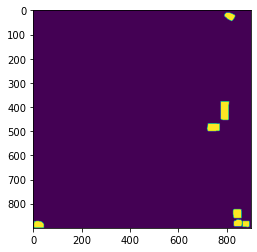

In [7]:
plt.imshow(bin_mask)

In [8]:
# Saving the dataframe
geo_df_full.to_file("processed_prediction_result.geojson", driver='GeoJSON')